In [17]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading "fish_clean" dataset
df_clean = pd.read_csv("fish_clean.csv", index_col=0)
df_clean.head()

,weight,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish,height_scaled,width_scaled
0,242.0,0,0,0,0,0,0,0.628166,-0.253837
1,290.0,0,0,0,0,0,0,0.822734,-0.083985
2,340.0,0,0,0,0,0,0,0.802337,0.147464
3,363.0,0,0,0,0,0,0,0.872322,0.004965
4,430.0,0,0,0,0,0,0,0.815557,0.405998


In [14]:
# Defining X
X = df_clean.drop(labels="weight", axis=1)
X.sample(5)

,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish,height_scaled,width_scaled
68,1,0,0,0,0,0,0.247009,-0.770321
33,0,0,0,0,0,0,1.940425,1.350442
65,1,0,0,0,0,0,0.056366,-0.688744
14,0,0,0,0,0,0,1.296114,0.427678
118,0,1,0,0,0,0,0.813024,1.701245


In [15]:
#Defining y
y = df_clean.filter(items=["weight"])
y.sample(5)

,weight
5,450.0
143,1550.0
111,840.0
114,700.0
82,110.0


In [16]:
# X and y Shape
X.shape, y.shape

((152, 8), (152, 1))

In [18]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((121, 8), (31, 8), (121, 1), (31, 1))

In [61]:
# Polynomial plot function
def poly_plot(feature, y_train_target, degree_number: list):
    """
    Ploting different degrees of polynomial regression upto "degree_number".
    You should apply the first parameter in this format: "X_train.feature".
    """
    x = np.squeeze(feature)
    y = np.squeeze(y_train_target)

    # print(x.shape)    # Debugging
    # print(y.shape)    # Debugging

    poly_func = dict()
    # Polynomial regression
    for d in degree_number:
        poly_func[d] = np.poly1d(np.polyfit(x, y, deg=d))

    # print(poly_func)    # Debugging
    
    # Generate evenly spaced values for plotting polynomial regression
    values = np.linspace(start = x.min(), stop = x.max(), num = len(x))

    # Plotting Polynomial regression
    plt.scatter(x, y, color="blue")
    
    c = "_rgbmyk"
    l = {1:"Linear",
         2:"Quadratic",
         3:"Cubic",
         4:"Quartic",
         5:"Quintic"}
    
    for d in degree_number:
        plt.plot(values, poly_func[d](values), color=c[d], label=l[d], linewidth=2)
    plt.xlabel(feature.name)
    plt.ylabel("Weight")
    plt.title(f"Polynomial Plot in different degrees for {feature.name}")
    plt.legend()
    plt.show()

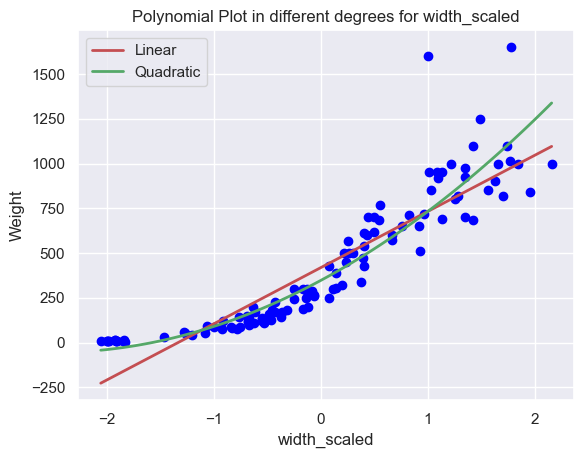

In [62]:
# Plotting polynomial regression for "width_scaled"
poly_plot(X_train.width_scaled, y_train, degree_number=[1, 2])

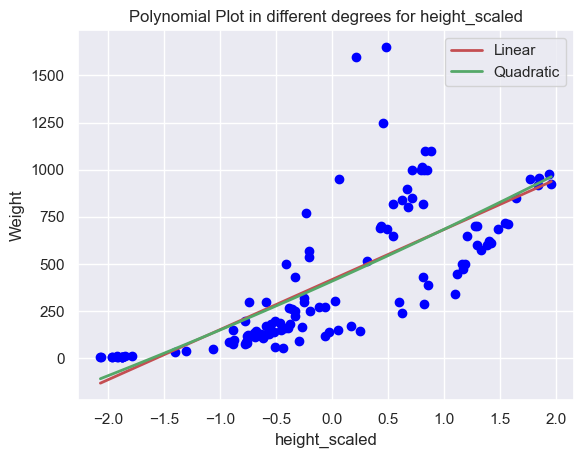

In [68]:
# Plotting polynomial regression for "height_scaled"
poly_plot(X_train.height_scaled, y_train, degree_number=[1, 2])